In [74]:
from pycaret.classification import *
import pandas as pd
import os

In [75]:
data_dir = "C:/Users/USER/Desktop/Gesture Data"
data_df = pd.read_csv("data_df.csv")

In [76]:
data_df.head()

,Time,imu0_ax,imu0_ay,imu0_az,imu1_ax,imu1_ay,imu1_az,imu2_ax,imu2_ay,imu2_az,imu3_ax,imu3_ay,imu3_az,Gesture
0,0,19.92,18.0,-18.45,17.38,0.23,-19.85,17.47,-1.82,-19.96,17.55,-0.57,-13.61,Backward
1,1,19.85,20.0,-16.91,14.76,0.23,-19.69,14.94,-2.83,-19.92,15.10,-0.88,-7.22,Backward
2,2,19.77,20.0,-15.36,12.14,0.23,-19.54,12.42,-3.83,-19.89,12.64,-1.19,-0.84,Backward
3,3,19.69,20.0,-13.81,9.52,0.23,-19.39,9.89,-4.84,-19.85,10.19,-1.49,5.55,Backward
4,4,19.62,20.0,-12.27,6.90,0.23,-19.23,7.36,-5.84,-19.81,7.74,-1.80,11.94,Backward


In [77]:
data_df.dtypes

Time         int64
imu0_ax    float64
imu0_ay    float64
imu0_az    float64
imu1_ax    float64
imu1_ay    float64
imu1_az    float64
imu2_ax    float64
imu2_ay    float64
imu2_az    float64
imu3_ax    float64
imu3_ay    float64
imu3_az    float64
Gesture     object
dtype: object

In [78]:
features = ['imu0_ax', 'imu0_ay', 'imu0_az', 'imu1_ax', 'imu1_ay', 'imu1_az', 'imu2_ax', 'imu2_ay', 'imu2_az', 'imu3_ax', 'imu3_ay', 'imu3_az']

In [79]:
# train using pycaret svm
clf = setup(data=data_df, target="Gesture", numeric_features=features, session_id=123)
svm = create_model("svm")

,Description,Value
0,Session id,123
1,Target,Gesture
2,Target type,Multiclass
3,Target mapping,"Backward: 0, Default: 1, Down: 2, Forward: 3, Left: 4, Right: 5, Up: 6"
4,Original data shape,"(2400, 14)"
5,Transformed data shape,"(2400, 14)"
6,Transformed train set shape,"(1680, 14)"
7,Transformed test set shape,"(720, 14)"
8,Numeric features,12
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5357,0.0000,0.5357,0.6427,0.4940,0.4582,0.4851
1,0.4464,0.0000,0.4464,0.5238,0.4330,0.3546,0.3624
2,0.4405,0.0000,0.4405,0.3919,0.3991,0.3479,0.3566
3,0.4524,0.0000,0.4524,0.4798,0.4413,0.3606,0.3761
4,0.4583,0.0000,0.4583,0.4904,0.4296,0.3688,0.3800
5,0.3274,0.0000,0.3274,0.5027,0.3243,0.2140,0.2419
6,0.4048,0.0000,0.4048,0.4293,0.3925,0.3045,0.3114
7,0.4345,0.0000,0.4345,0.5975,0.4485,0.3406,0.3576
8,0.4524,0.0000,0.4524,0.5099,0.4173,0.3632,0.3781


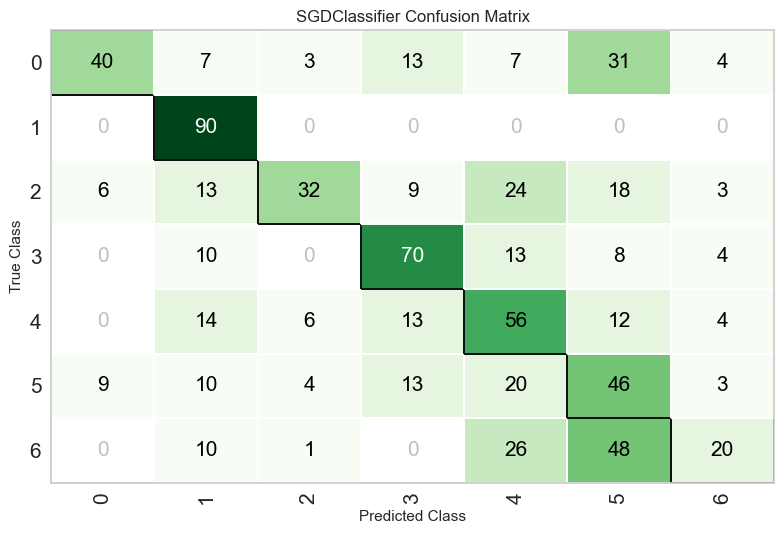

In [80]:
plot_model(svm, plot="confusion_matrix")

In [81]:
clf = setup(data=data_df, target="Gesture",numeric_features=features, session_id=123, experiment_name="experiment_1")
best_model = compare_models()
print(best_model)

,Description,Value
0,Session id,123
1,Target,Gesture
2,Target type,Multiclass
3,Target mapping,"Backward: 0, Default: 1, Down: 2, Forward: 3, Left: 4, Right: 5, Up: 6"
4,Original data shape,"(2400, 14)"
5,Transformed data shape,"(2400, 14)"
6,Transformed train set shape,"(1680, 14)"
7,Transformed test set shape,"(720, 14)"
8,Numeric features,12
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6274,0.0000,0.6274,0.6474,0.6263,0.5655,0.5689,0.0220
gbc,Gradient Boosting Classifier,0.6262,0.0000,0.6262,0.6286,0.6199,0.5641,0.5662,0.6310
et,Extra Trees Classifier,0.6262,0.0000,0.6262,0.6449,0.6248,0.5641,0.5674,0.0830
knn,K Neighbors Classifier,0.6250,0.0000,0.6250,0.6422,0.6221,0.5627,0.5662,0.0300
lightgbm,Light Gradient Boosting Machine,0.6232,0.0000,0.6232,0.6297,0.6191,0.5606,0.5626,0.7310
rf,Random Forest Classifier,0.6196,0.0000,0.6196,0.6225,0.6146,0.5564,0.5583,0.0980
lr,Logistic Regression,0.5500,0.0000,0.5500,0.5404,0.5324,0.4756,0.4792,0.1560
lda,Linear Discriminant Analysis,0.5060,0.0000,0.5060,0.5033,0.4902,0.4248,0.4294,0.0170
nb,Naive Bayes,0.5024,0.0000,0.5024,0.5247,0.4814,0.4211,0.4301,0.0200
ridge,Ridge Classifier,0.4899,0.0000,0.4899,0.4891,0.4556,0.4063,0.4158,0.0160


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')


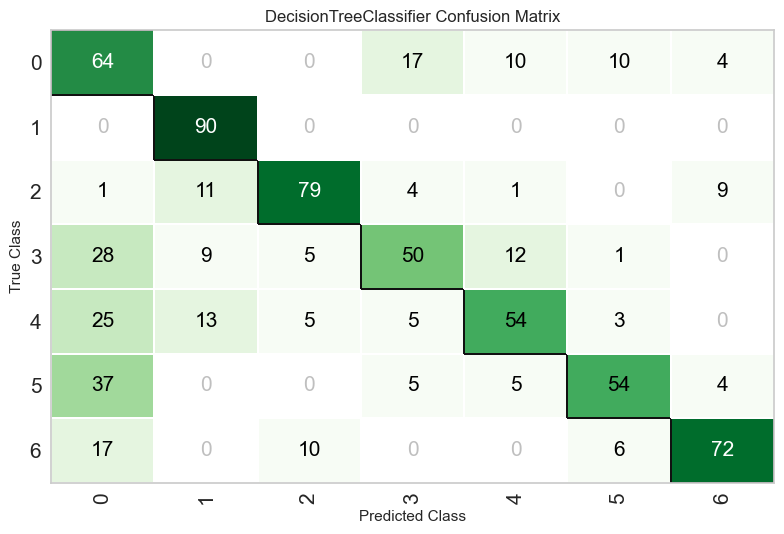

In [82]:
cf = plot_model(best_model, plot="confusion_matrix")

In [104]:
new_data = pd.read_csv('Petch(Dyna)\PetchBackward(Dyna).csv')
new_data = new_data.iloc[:, :-1]
new_data

,Time,imu0_ax,imu0_ay,imu0_az,imu1_ax,imu1_ay,imu1_az,imu2_ax,imu2_ay,imu2_az,imu3_ax,imu3_ay,imu3_az
0,0,-4.79,-9.26,8.47,2.14,-4.90,5.07,-0.04,-5.87,7.40,-0.42,-5.91,6.82
1,1,-2.34,-14.24,13.37,4.28,-9.81,10.13,-0.09,-11.73,14.81,-0.84,-11.82,13.64
2,2,0.11,-19.21,18.27,6.42,-14.71,15.20,-0.13,-17.60,20.00,-1.26,-17.73,20.00
3,3,2.57,-20.00,20.00,8.56,-19.61,20.00,-0.17,-20.00,20.00,-1.69,-20.00,20.00
4,4,5.02,-20.00,20.00,10.70,-20.00,20.00,-0.22,-20.00,20.00,-2.11,-20.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,20.00,-20.00,20.00,20.00,-20.00,20.00,-4.14,-20.00,20.00,-20.00,-20.00,20.00
96,96,20.00,-20.00,20.00,20.00,-20.00,20.00,-4.18,-20.00,20.00,-20.00,-20.00,20.00
97,97,20.00,-20.00,20.00,20.00,-20.00,20.00,-4.22,-20.00,20.00,-20.00,-20.00,20.00
98,98,20.00,-20.00,20.00,20.00,-20.00,20.00,-4.27,-20.00,20.00,-20.00,-20.00,20.00


In [105]:
save_model(best_model, "maomaotrain")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['imu0_ax', 'imu0_ay', 'imu0_az',
                                              'imu1_ax', 'imu1_ay', 'imu1_az',
                                              'imu2_ax', 'imu2_ay', 'imu2_az',
                                              'imu3_ax', 'imu3_ay', 'imu3_az'],
                                     transformer=SimpleI...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                  

In [106]:
model = load_model('maomaotrain')

Transformation Pipeline and Model Successfully Loaded


In [110]:
predictions = model.predict(new_data)
print(predictions)
predictions.to_csv('predict1.csv', index=False)

0         Left
1         Left
2         Down
3         Down
4         Down
        ...   
95    Backward
96    Backward
97    Backward
98    Backward
99          Up
Name: Gesture, Length: 100, dtype: object
